In [1]:
import math as m
import numpy as np
import pandas as pd
import IPython.display as ipd
import sympy as sy

x, y, z = sy.symbols('x y z')
sy.init_printing()
radianos = m.radians

# LISTA 7 QUESTÃO 1 E 2

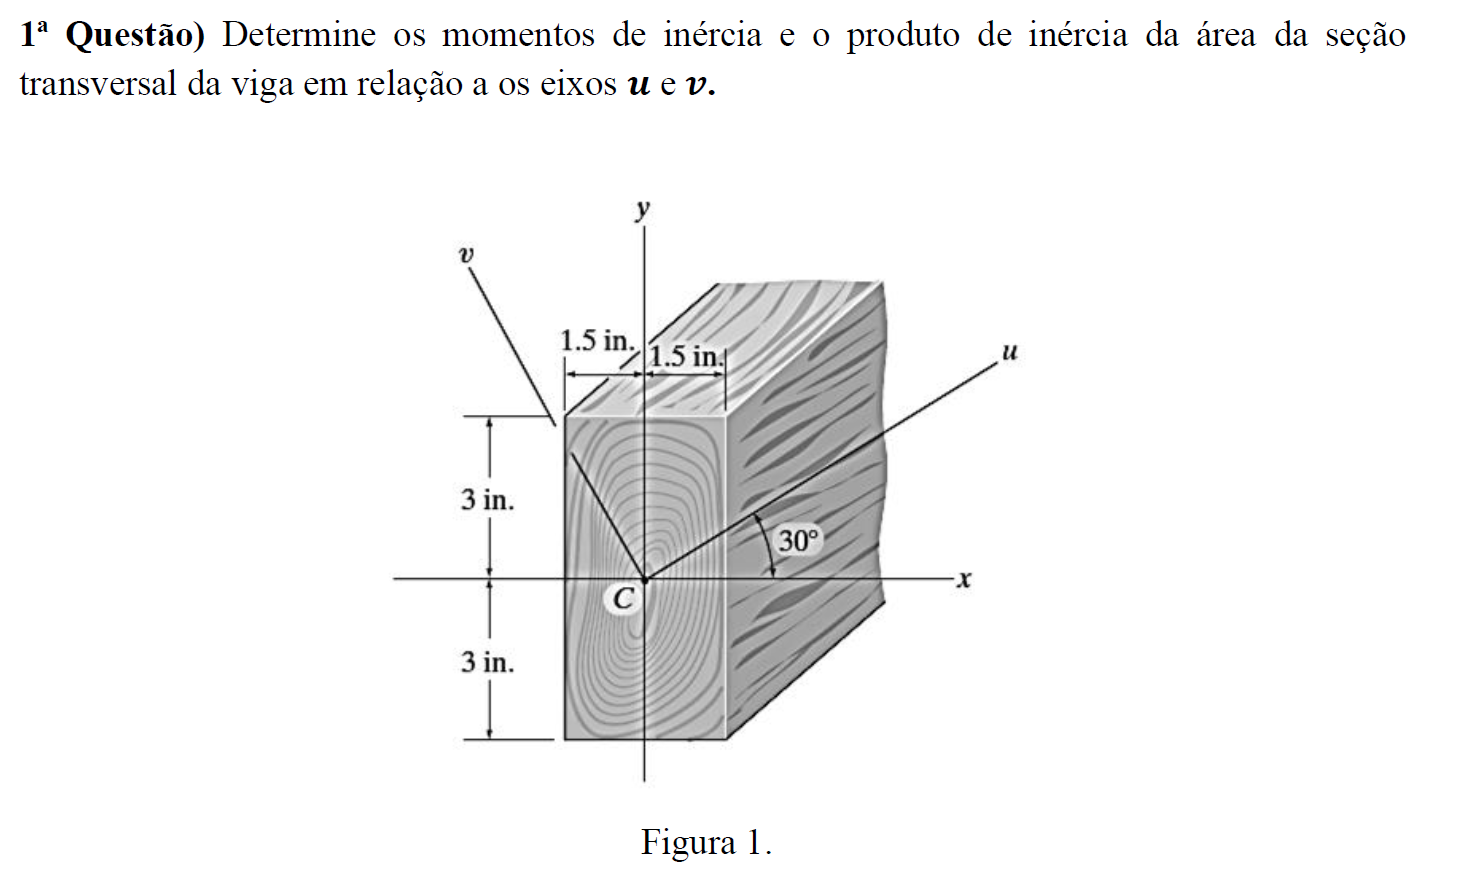

In [2]:
ipd.Image(filename='L7Q1.png')

### Dados Necesários:

In [3]:
Ly = 3 # [in]
Lx = 1.5 # [in]
theta = 30 # [º ]
theta = radianos(theta) # [rad]

Objetivos:
Calcular o momento e o produto de inércia e depois rotacionar o plano de momentos em 30º
1. realizar os cálculos das inércias:
2. Os valores são para o plano principal de inércias:

In [4]:
Iy = (Ly * 2) * (Lx * 2) ** 3 / 12
Ix = (Lx * 2) * (Ly * 2) ** 3 / 12
I_xy = 0

Criando tabela para listar as inércias obtidas com a área da secção:

In [5]:
data_inertia = pd.DataFrame({
    'Inércia em X (in^4)': Ix,
    'Inércia em Y (in^4)': Iy,
    'Produto inércia (in^4)': I_xy
}, index=[0])
data_inertia

,Inércia em X (in^4),Inércia em Y (in^4),Produto inércia (in^4)
0,54.0,13.5,0


A 'analise_inertia' é uma função que engloba as equações de transformação de inércia e retorna em uma tabela os valores de cada transformação:

In [6]:
def analise_inertia(ix, iy ,pxy, a):
    angle = a
    inertia_x  = ((ix+iy)/2) + ((ix- iy)/2)*np.cos(2*angle) + (pxy/2)*np.sin(2*angle)
    inertia_y = ((ix+iy)/2) - ((ix-iy)/2)*np.cos(2*angle) - (pxy/2)*np.sin(2*angle)
    produto_xy = (ix-iy)/2*np.sin(2*angle) + pxy*np.cos(2*angle)

    data_rotate = pd.DataFrame({
    'Ângulo ( º)': m.degrees(a),
    'Inércia em U (in^4)': inertia_x,
    'Inércia em V (in^4)': inertia_y,
    'Produto inércia (in^4)': produto_xy
    }, index=[0])
    return data_rotate

In [7]:
analise_inertia(data_inertia.iloc[0:1, 0:1].squeeze(), data_inertia.iloc[0:1, 1:2].squeeze(), data_inertia.iloc[0:1, 2:3].squeeze(), theta)

,Ângulo ( º),Inércia em U (in^4),Inércia em V (in^4),Produto inércia (in^4)
0,30.0,43.875,23.625,17.537014


A 'inertia_principal' vai realizar os cálculos do circulo de Mohr para os valores repassados e encontrar as inércias principais associadas:

In [8]:
def inertia_principal (x, y, z):
    angular = np.arctan(2 * z / (x - y)) / 2
    angular = m.degrees(angular)
    inertia_media = (x + y) / 2
    radius = m.sqrt(((x - y) / 2) ** 2 + (z / 2) ** 2)
    main_1 = inertia_media + radius
    main_2 = inertia_media - radius

    data_rotate = pd.DataFrame({
    'Centro do circulo (in^4)': inertia_media,
    'Ângulo principal ( º)': angular,
    'Inércia P1 (in^4)': main_1,
    'Inércia P2 (in^4)': main_2,
    'Produto max (in^4)': radius
    }, index=[0])

    return data_rotate.T

In [9]:
inertia_principal(data_inertia.iloc[0:1, 0:1].squeeze(), data_inertia.iloc[0:1, 1:2].squeeze(), data_inertia.iloc[0:1, 2:3].squeeze())

,0
Centro do circulo (in^4),33.75
Ângulo principal ( º),0.00
Inércia P1 (in^4),54.00
Inércia P2 (in^4),13.50
Produto max (in^4),20.25


os ângulos principais possuem uma defasagem de 90º entre si, ou seja, se o ângulo principal é 0, o próximo ângulo principal vai ser 0º + 90º = 90º